Objective
Decision Tree & Random Forest 
We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.
 

# 1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('titanic-passengers.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [5]:
# Drop rows that has missing values 
df = df.dropna(subset=['Embarked']) 

In [6]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0,0,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0,0,1


In [7]:
str(df)

'     PassengerId Survived  Pclass  \\\n0            343       No       2   \n1             76       No       3   \n2            641       No       3   \n3            568       No       3   \n4            672       No       1   \n..           ...      ...     ...   \n886           10      Yes       2   \n887           61       No       3   \n888          535       No       3   \n889          102       No       3   \n890          428      Yes       2   \n\n                                                  Name     Sex   Age  SibSp  \\\n0                           Collander, Mr. Erik Gustaf    male  28.0      0   \n1                              Moen, Mr. Sigurd Hansen    male  25.0      0   \n2                               Jensen, Mr. Hans Peder    male  20.0      0   \n3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   \n4                               Davidson, Mr. Thornton    male  31.0      1   \n..                                                 ...     

In [8]:
# Filling missing values in Cabin column with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])

In [9]:
# cabin into one-hot
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')


In [10]:
# sex into one-hot
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

In [11]:
# function to extract title from Name column
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(get_title)

print(df['Title'].unique())
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

['Mr' 'Mrs' 'Miss' 'Dr' 'Major' 'Don' 'Master' 'Rev' 'Col' 'Mlle' 'Lady'
 'Jonkheer' 'Mme' 'Sir' 'Capt' 'the Countess' 'Ms']


In [12]:
# age median of each title
age_median = df.groupby('Title')['Age'].median()
print(age_median)

def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)


Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [13]:
# Drop all columns with categorical values
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1)

In [14]:
# target (y) , features(X)
y = df['Survived'].values
X = df.iloc[:,1:].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

In [16]:
clf = LogisticRegression()

In [17]:
# Training model
clf.fit(X_train, y_train)

C:\Users\arokh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# accuracy score
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8537271448663853
0.7865168539325843


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)


In [20]:
# Outcome variable
(DV <- "Survived")

# Predictor variables Model [1]
(IVs <- c("Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", 
          "Title", "Master.Male", "Female.Group"))

# Create the formula string 
(FMLA <- paste(DV, "~", paste(IVs, collapse = " + ")))

# Create recipe of formula
FMLA.Recipe <- recipe(Survived ~ Pclass + Sex + Age + SibSp + 
                      Parch + Fare + Embarked +  Title + Master.Male +
                      Female.Group, 
                      data = train.cv)

SyntaxError: invalid syntax (<ipython-input-20-3a03817a97ae>, line 12)

In [ ]:
#Print Confusion matrix 
pred = .predict(X)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [21]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [22]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [23]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

C:\Users\arokh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


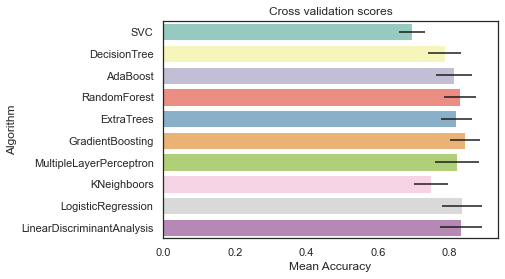

In [24]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install pydotplus

In [36]:
!pip install --upgrade scikit-learn==0.20.3

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\arokh\anaconda3\lib\site-packages\scikit_learn-0.24.1.dist-info\
   from C:\Users\arokh\anaconda3\Lib\site-packages\~cikit_learn-0.24.1.dist-info
  Moving to c:\users\arokh\anaconda3\lib\site-packages\sklearn\
   from C:\Users\arokh\anaconda3\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\arokh\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\arokh\\AppData\\Local\\Temp\\pip-install-hn1892w4\\scikit-learn_b1c672436be749a0a8e38f9cc494bc42\\setup.py'"'"'; __file__='"'"'C:\\Users\\arokh\\AppData\\Local\\Temp\\pip-install-hn1892w4\\scikit-learn_b1c672436be749a0a8e38f9cc494bc42\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\arokh\AppData\Local\Temp\pip-wheel-0_8jms50'
       cwd: C:\Users\arokh\AppData\Local\Temp\pip-install-hn1892w4\scikit-learn_b1c672436be749a0a8e38f9cc494bc42\
  Complete output (675 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler

In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

NameError: name 'survived' is not defined

# 3. Change the decision tree parameters(change at least two parameters), 

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

# 4. Calculate the new accuracy and compare it with the previous results. 

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

# 5. Use random forest then change the number of estimators

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 200, 2)

# 6. Calculate the new accuracy and compare it with the previous result.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.